## Continous Assessment II - Artificial Intelligence module

# Informed AI Search

### **Lecturer**: David McQuaid  

**Student name**: Lais Carvalho | **student ID**: 2019435 | **email**: 

**Date:** December / 2020

## Notebook's Overview

This Jupyter Notebook constains the answers for the Continous Assessment II worth 40% of the final grade for Year 4 of the module Artifical Intelligence on the couse of Computing and Multimedia at CCT College Dublin.

The document is divided into 2 parts:
* **[Part I](#Part-I)**: contains the **theorethical explanation** of the assessment;
* **[Part II](#Part-II)**: contains the **demonstration** of **Djikstra's** algorithm on a graph and the comparison of the performance between the earlier and the **A* search** algorithm.

## Part I
### Questions [a](#a\)-Problems) and [b](#b\)-Demonstration-Djikstra-algorithm).
Figure 1 below represents a puzzle. The goal is to get from node A to node J.

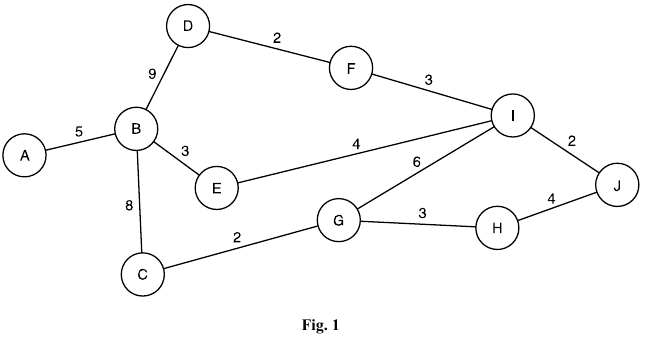

### a) Problems

**i. The two main differences between graphs and trees are:**

* Trees have a unique node (known as root), whilst graphs are non-hierarchical structures (no 'root').
* Graphs can form cycles, and trees cannot, since to be considered a tree there has to be a parent and at least one child. (Vaghani, 2020)

In summary, a graph follows a network model and a tree is the most appropriate way to represent relationships between nodes in a hierarchical way. A graph can have edges closing on a loop whilst a tree's vertices can never be connected.


**ii. How does the graph abstracts the puzzle problem?**

The graph is an abstraction of the puzzle in a sense that each node represents a `state` that the puzzle is in, i.e. a different combination of pieces have been added to it, with node A being the origin, the `starting state` of the puzzle (origin) and node J being a complete puzzle (`finished state`).

For each piece addition (or set of additions) to the puzzle, the 'search' algorithm moves to the next node (`current state`).

If the player follows the states on nodes A > B > E > I > J in this order, the puzzle will be completed in optimal time (shortest path).

**iii. Two main advantages of using a graph visualisation**

Building a graph to represent a problem (usually a network problem) allows one to apply **(1) Abstraction** and **(2) Optimisation** to the subject matter.

(1) The goal with abstraction is to build a computational model. To visualise problems on a abstract way to be able to simulate different approaches to solve it, analyse the most effective solutions and even predict possible outcomes.

(2) Being able to run multiple scenarions on a relatively short time interval makes possible to optimise the solutions found during the _brainstorm_ analysis in order to reach the most efficient output (or the fastest one). ([MIT OpenCourseWare, 2017](https://www.youtube.com/watch?v=V_TulH374hw))
> Note: An optimal solution for a problem is based on the system's requirements and the problem's constraints. Speed by itself is not _always_ the goal to accomplish.  Moreover, when facing problems that require abstraction and optimisation, it is advised to carefully analyse each use-case scenario throughly before electing the "best solution".

### **b) Demonstration Djikstra algorithm**

The way in which Djikstra would find the shortest path is by building a set of nodes that have minimum distance from the source. The diagram with the exemplification goes as follows:

* Step 1: The algorithm will pick the first node and calculate distances to adjacent ones. After evaluation of the shortest edge, it will electhat that path and move on to the next node to perform the next evaluation.

![step_by_step_gif](./img/origin.gif)

* Step 2: The next step then is to check the path to all adjacent nodes (repeat step 1) and sum the current edge distance to the previous one (distance to the current node), in this case, `node E`.
* Step 3: Repeat step 2 until all nodes have been visited (and distance computed). Output the path with the shortest sum of edges (shortest path).

## Part II
### Comparison between [Djikstra's](#Djikstra's-algorithm) and [A* search](#A*-search-algorithm) implementations

### Djikstra's algorithm
The animation above shows the implementation for the Djikstra's alg. on this specific case. In general, the pseudocode will resemble the fluxogram added below.

In short, there will be a class `Graph` where the nodes and edges will be inserted. A dictionary with the computed `distances` from start to current node, another dictionary with the optimal (smallest) distance from `previous` to source and a list with `nodes`. The initial distance will be set to ZERO and for each node visited there will be two checks:

0. Is the current node the destination one? If yes, return the `distances` and exit the loop.
1. If not, evaluate the distance from previous node to current one. If smaller, update it and add the node the list of visited nodes. Check the next node until check `0` evaluates to a truthy value OR list of univisited nodes is empty.

Return the list with nodes names which form the shortest path.

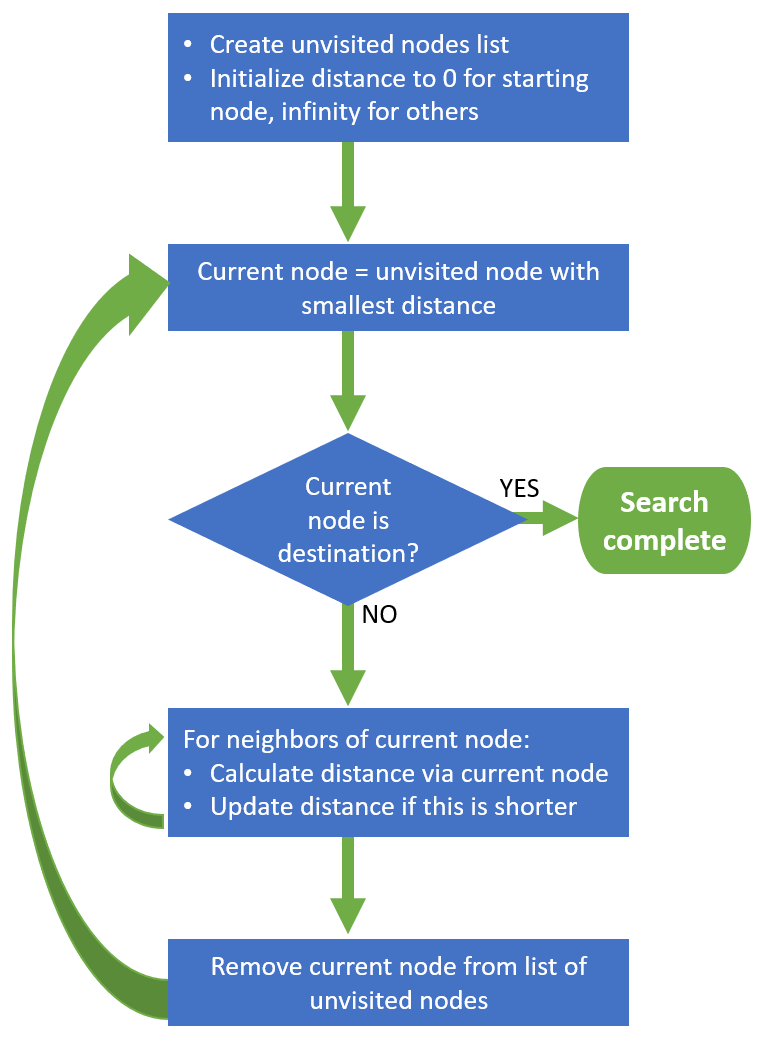
Source: [Mahugh, 2019](https://www.dougmahugh.com/dijkstra/)

#### Programmatic implementation Djikstra's algorithm
The python code on the cell below was forked from [this](https://github.com/mburst/dijkstras-algorithm/blob/master/dijkstras.py) GitHub repository and modified to suit this specific use-case.

In [1]:
# %%timeit
import heapq
import sys


class Graph:
    
    def __init__(self):
        self.vertices = {}
        
    def add_vertex(self, name, edges):
        self.vertices[name] = edges
    
    def shortest_path(self, start, finish):
        distances = {} # (dict) Distance from start to node
        previous = {}  # (dict) Previous node in optimal path from source
        nodes = [] # (list) Priority queue of all nodes in Graph

        for vertex in self.vertices:
            if vertex == start: # Set root node as distance of 0
                distances[vertex] = 0
                heapq.heappush(nodes, [0, vertex])
            else:
                distances[vertex] = sys.maxsize
                heapq.heappush(nodes, [sys.maxsize, vertex])
            previous[vertex] = None
        
        while nodes:
            smallest = heapq.heappop(nodes)[1] # Vertex in nodes with smallest distance in distances
            if smallest == finish: # If the closest node is our target we're done so print the path
                path = []
                while previous[smallest]: # Traverse through nodes until we reach the root which is 0
                    path.append(smallest)
                    smallest = previous[smallest]
                    rev_path = path[::-1] #reverses the path from end to start
                return start, rev_path
            if distances[smallest] == sys.maxsize: # All remaining vertices are inaccessible from source
                break
            
            for neighbor in self.vertices[smallest]: # Look at all the nodes that this vertex is attached to
                alt = distances[smallest] + self.vertices[smallest][neighbor] # Alternative path distance
                if alt < distances[neighbor]: # If there is a new shortest path update our priority queue (relax)
                    distances[neighbor] = alt
                    previous[neighbor] = smallest
                    for n in nodes:
                        if n[1] == neighbor:
                            n[0] = alt
                            break
                    heapq.heapify(nodes)
        return distances
        
    def __str__(self):
        return str(self.vertices)

if __name__ == '__main__':
    g = Graph()
    g.add_vertex('A', {'B': 5})
    g.add_vertex('B', {'A': 5, 'D': 9, 'C': 8, 'E': 3})
    g.add_vertex('C', {'B': 8, 'G': 2})
    g.add_vertex('D', {'B': 9, 'F': 2})
    g.add_vertex('E', {'B': 3, 'I': 4})
    g.add_vertex('F', {'D': 2, 'I': 3})
    g.add_vertex('G', {'C': 2, 'I': 6, 'H': 3})
    g.add_vertex('H', {'G': 3, 'J': 4})
    g.add_vertex('I', {'F': 3, 'E': 4, 'G': 6, 'J': 2})
    g.add_vertex('J', {'I': 2, 'H': 4})
    
    res_path = g.shortest_path('A', 'J')
    
    print("From node A to node J, the shortest path is through: ", res_path)

From node A to node J, the shortest path is through:  ('A', ['B', 'E', 'I', 'J'])


### A* search algorithm
To perform an informed search, each node in the tree (graph or map) will have a _weight_ assigned (heuristic) to it that will make possible to quickly compute the cost to get to the goal node.
> NOTE: In order for the *A star* search to return the shortest/optimal path, heuristic distances can **never** overestimate the real cost (Manhattan distance) to the goal. It must either underestimate it or to match it.


Starting from the start node `A`, the heuristic distance is logged from the node to the dictionary of visited nodes. The search proceeds to expand. For each visited node (when all possibilities are evaluated) the shorthest A* score is chosen and added to the dictionary of visited nodes.
When all nodes expanded have the same *A* cost*, the algorithm performs the expansion/evaluation on the next node following the alphabetical order. Finally, the heuristic measure for goal states are always ZERO.

A* score = cost of the path (so far) + heuristic of the end node of the path
which gives an estimate of the total cost of the path so far.

The [Berkley video](https://youtu.be/b9fH-j_yNHU?t=158) specifies the formualaes as such:

`F(n) = G(n) + H(n)`, where:
* `F(n)` = A* score;
* `G(n)` = Uniform Cost order (a.k.a. *backward cost*) i.e., edge distance from start node to end node;
* `H(n)` = Greedy order (a.k.a. *forward cost*) i.e., heuristic distance between current node and end node).


#### Programmatic implementation A* search algorithm
For the implementation, the code available on [this GitHub repository](https://github.com/marcoscastro/a_star_search_algorithm) was used and slightly adapted for better understanding and Python 3 compatibility.

In [2]:
import heapq  # PriorityQueue
from collections import defaultdict


# class that represents a priority queue
class PriorityQueue:
    def __init__(self):
        self._queue = []
        self._index = 0

    def insert(self, item, priority):
        # inserts node items into the priority queue
        heapq.heappush(self._queue, (priority, self._index, item))
        self._index += 1

    def remove(self):
        # removes node items into the priority queue
        return heapq.heappop(self._queue)[-1]

    def isEmpty(self):
        # checks if the priority queue is empty
        return len(self._queue) == 0

    def getSize(self):
        # returns the size of the priority queue
        return self._index


# class that represents a node
class Node:

    # "key" is the node identifier
    # "forward_cost" is h(n) (cost of the heuristic)
    # "forward_cost" is used in the calculate of "A* search": f(n) = g(n) + h(n) where
    # h(n) is the forward cost and g(n) is the backward cost
    # remember: "A* search" is the combination of Uniform-cost (UCS) and Greedy
    def __init__(self, key, forward_cost):
        self.key = key
        self.forward_cost = forward_cost

    def getKey(self):
        # returns the key of the dictionary for a node
        return self.key

    def getForwardCost(self):
        # returns the forward cost ()
        return self.forward_cost


# class that represents a graph/map
class Graph_A:
    def __init__(self):
        self.nodes = {}  # dictionary of the nodes
        self.edges = []  # list of 3-tuple (source, destination, weight)
        self.path = []  # path

        # dictionary with the lists of successors of each node, faster for get the successors
        # each item of list is a 2-tuple: (destination, weight)
        self.successors = defaultdict(list)

    def addEdge(self, source, destination, weight):
        edge = (source, destination, weight)  # creates tuple (3-tuple)
        if not self.existsEdge(edge):  # adds edge if not exists
            self.nodes[source], self.nodes[destination] = (
                source,
                destination,
            )  # adds the nodes
            self.edges.append(edge)  # adds edge
            self.successors[source.getKey()].append(
                (destination, weight)
            )  # adds successor
        else:
            print(
                "Error: edge (%s -> %s with weight %s) already exists!!"
                % (edge[0].getKey(), edge[1].getKey(), edge[2])
            )

    def existsEdge(self, edge):
        # Checks the existance of edges between nodes
        for e in self.edges:
            # compares source's key, destionation's key and weight of edge
            if (
                e[0].getKey() == edge[0].getKey()
                and e[1].getKey() == edge[1].getKey()
                and e[2] == edge[2]
            ):
                return True
        return False

    def getPath(self):
        # Returns the path found
        return self.path

    def executeAStar(self, initial_node, goal_node):
        # Runs the "A*" search (meat of the program)
        if not self.edges:
            print("Error: graph not contains edges!!")
        else:
            # checks if both the nodes exists
            if initial_node in self.nodes and goal_node in self.nodes:
                if initial_node == goal_node:  # checks if are the same nodes
                    return 0

                queue = PriorityQueue()  # creates a priority queue (min heap)

                # "distance_vector" and "antecessors" are used for reconstruct the path
                distance_vector, antecessors = {}, {}
                for node in self.nodes:
                    distance_vector[node.getKey()] = None  # initializes with None
                    antecessors[node.getKey()] = None
                distance_vector[initial_node.getKey()] = 0

                # calculates costs
                g_cost, h_cost = 0, initial_node.getForwardCost()
                f_cost = g_cost + h_cost
                queue.insert((initial_node, g_cost, h_cost), f_cost)
                total_cost = None

                while True:

                    # a item of the queue is a 3-tuple: (current_node, g_cost, h_cost)
                    current_node, g_cost, h_cost = queue.remove()

                    # gets all the successors of "current_node"
                    successors = self.successors[current_node.getKey()]

                    for successor in successors:
                        destination, weight = successor  # unpack 2-tuple successor

                        # calculates costs
                        new_g_cost = g_cost + weight
                        h_cost = destination.getForwardCost()
                        f_cost = new_g_cost + h_cost
                        queue.insert((destination, new_g_cost, h_cost), f_cost)

                        # updates "distance_vector"
                        if distance_vector[destination.getKey()]:
                            if distance_vector[destination.getKey()] > new_g_cost:
                                distance_vector[destination.getKey()] = new_g_cost
                                antecessors[
                                    destination.getKey()
                                ] = current_node.getKey()
                        else:
                            distance_vector[destination.getKey()] = new_g_cost
                            antecessors[destination.getKey()] = current_node.getKey()

                        # verifies that reached the goal
                        if destination.getKey() == goal_node.getKey():
                            # updated "total_cost"
                            if not total_cost:
                                total_cost = f_cost
                            elif f_cost < total_cost:
                                total_cost = f_cost

                    if queue.isEmpty():  # verifies if the queue is empty
                        # reconstructs the path
                        curr_node = goal_node.getKey()
                        while curr_node:
                            self.path.append(curr_node)
                            curr_node = antecessors[curr_node]
                        self.path = self.path[::-1]
                        return total_cost
            else:
                print("Error: the node(s) do not exist in the graph!!")

In [3]:
# Map the graph as nodes (heuristic values)
nodeA = Node("A", 1)
nodeB = Node("B", 1)
nodeC = Node("C", 1)
nodeD = Node("D", 1)
nodeE = Node("E", 1)
nodeF = Node("F", 1)
nodeG = Node("G", 1)
nodeH = Node("H", 1)
nodeI = Node("I", 1)
nodeJ = Node("J", 1)

# Call the functions on the graphed methods
graph = Graph_A()
graph.addEdge(nodeA, nodeB, 5)
graph.addEdge(nodeB, nodeC, 8)
graph.addEdge(nodeB, nodeD, 9)
graph.addEdge(nodeB, nodeE, 3)
graph.addEdge(nodeC, nodeG, 2)
graph.addEdge(nodeD, nodeF, 2)
graph.addEdge(nodeE, nodeI, 4)
graph.addEdge(nodeF, nodeI, 3)
graph.addEdge(nodeG, nodeI, 6)
graph.addEdge(nodeG, nodeH, 3)
graph.addEdge(nodeH, nodeJ, 4)
graph.addEdge(nodeI, nodeJ, 2)

# Determine total cost and path
total_cost = graph.executeAStar(nodeA, nodeJ)
path = graph.getPath()

# Return values
if total_cost:
    print(f'Total cost of graph: %s. \nPath: %s' %(total_cost, path))
else:
    print('Did not reach the goal!')


Total cost of graph: 15. 
Path: ['A', 'B', 'E', 'I', 'J']


## Explanation and Comparison

The A* (pronounced __'*a star*'__) search algorithm is very similar to Djikstra's for finding the shortest path from an origin node to a certain end. The difference is that _A*_ will also use heuristics to perform a so called informed search on the tree/graph/map/chosen data structure. Hence, making an informed choice on which node to follow next, finding the optimal path to the goal and avoiding searching on nodes which will lead to further away from the objective of the search.  
In summary, *A star* uses the accumulated distance to the goal node PLUS admissable heristics (relative distance). Whilist Djikstra uses the so-called _taxi-driver_ distance, i.e. the edge distance only between nodes.

##  Time statistics comparing the two implementations 
### (additional marks)
The Python built-in standard library named [`time()`](https://docs.python.org/3/library/time.html#time.time) makes possible to assess the time that an algorithm takes to execute (in seconds). The two main functions used are `process_time()` and `perf_time()` (add a flag `ns` for an output in nanoseconds).

Considering those methods produce different output everytime they run, for the sake of this evaluation this section will be observed using the [iPython magic-commands](https://jakevdp.github.io/PythonDataScienceHandbook/01.03-magic-commands.html#Timing-Code-Execution:-%timeit) `%%timeit` (for cell statements) and `%timeit` (for single-line statements) (VanderPlas, 2020).

### Magic commands
The line magic `%timeit` and the cell-magic `%%timeit` will return the average runs for the function according to code complexity.

The conclusions can be read at the [Time runs](#Time-runs) section below.

## Time runs 
For the Djikistra algorithm implementation, the system caches the result automatrically and the best out of 5 runs (selected from a 100,000 runs) is around 19 nanoseconds per loop.

In [4]:
%%timeit
# Djikstra implementation - function call for shortest path
res_path = g.shortest_path('A', 'J')

10000 loops, best of 5: 18.4 µs per loop


For the A* search, which uses heuristics to calculate the best (shortest) path to be followed, the result out of 1,000 loops is around 250 nanoseconds per loop.

In [5]:
%%timeit
# A* implementation - function call for shortest path
total_cost = graph.executeAStar(nodeA, nodeJ)

The slowest run took 5.20 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 5: 255 µs per loop


### Comparison

In this case, the A* is taking 14 times longer than Djikstra to run the exact same graph/use-case. The result does not corroborate with the theory (and logic) of A* being faster and more efficient.

Knowing this is not the case, it is possible to affirm that the reason for such disparity is due to the complexity (big O notation) in which the A* implementation was written. The function `executeAStar()` has several nested `if` and a `for` loops inside a while with more `if`s within, which increase the time and space complexity of the code.

## References

Vaghani, R., 2020. Difference Between Graph And Tree - Geeksforgeeks. [online] GeeksforGeeks. Available at: <https://www.geeksforgeeks.org/difference-between-graph-and-tree/> [Accessed December 8th 2020].

MIT OpenCourseWare, 2017. 3. Graph-Theoretic Models. [video] Available at: <https://www.youtube.com/watch?v=V_TulH374hw> [Accessed December 8th 2020].

VanderPlas, J., 2020. Ipython Magic Commands | Python Data Science Handbook. [online] Jakevdp.github.io. Available at: <https://jakevdp.github.io/PythonDataScienceHandbook/01.03-magic-commands.html> [Accessed December 10th 2020].

Brilliant.org. 2020. Dijkstra's Shortest Path Algorithm | Brilliant Math & Science Wiki. [online] Available at: <https://brilliant.org/wiki/dijkstras-short-path-finder/> [Accessed December 10th 2020].